# Time Series 

## 1.1 Linear Regression With Times Series

In [3]:
from html.parser import incomplete

import pandas as pd

df = pd.read_csv(
    "archive/book_sales.csv",
    index_col='Date',
    parse_dates=['Date'],
).drop('Paperback', axis=1)

df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


Linear Regression with 2 features : $$ target = weight_1 * feature_1 + weight_2 * feature_2 + biais $$

In [4]:
import numpy as np

df['Time']=np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


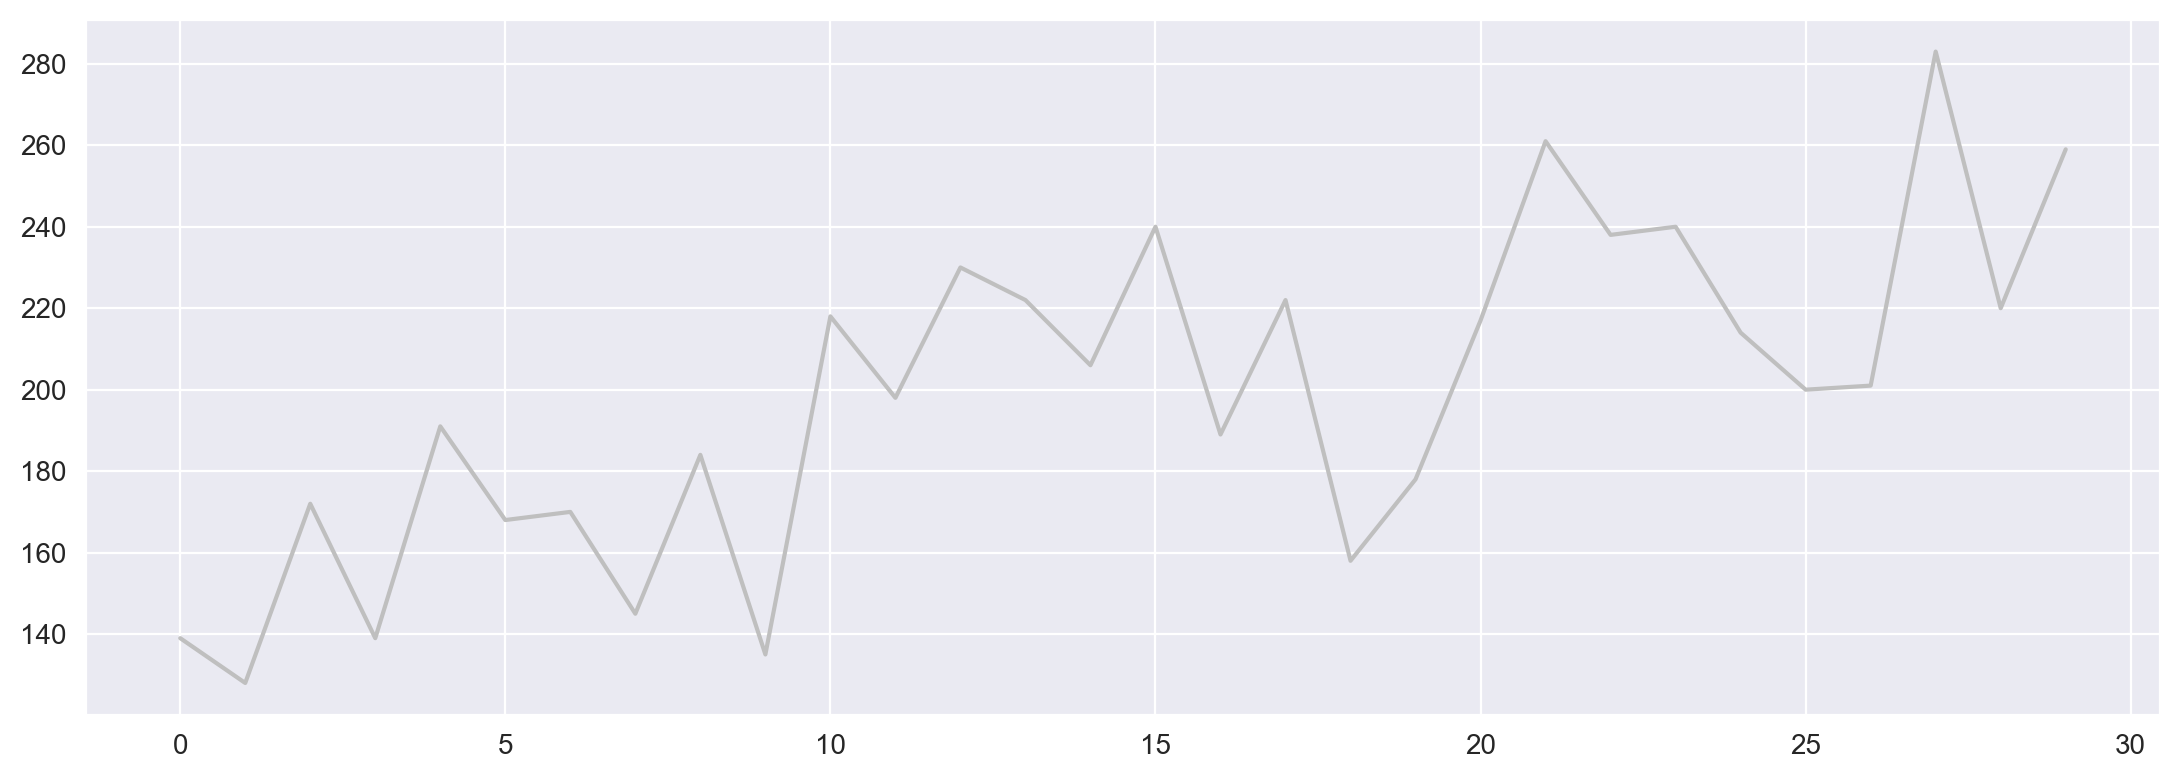

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')

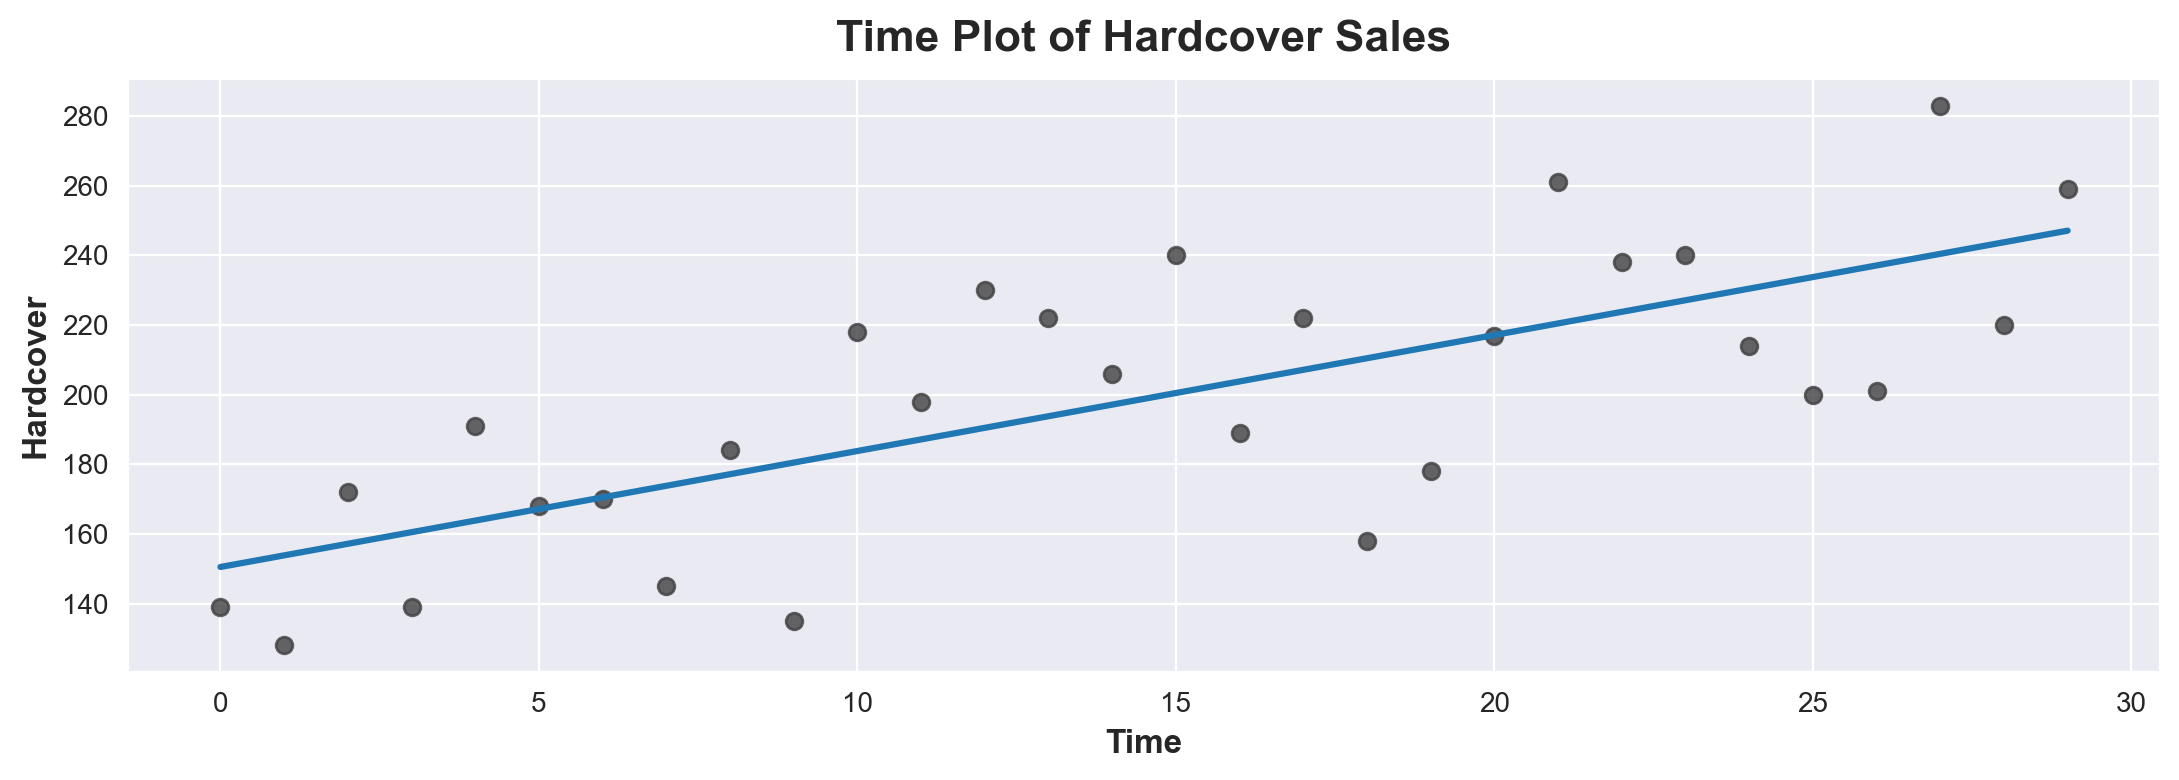

In [6]:
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');


Lag features use past values of a time series to help predict future values by shifting observations backward in time.

In [7]:
df['Lag_1'] = df['Hardcover'].shift(1)
df=df.reindex(columns=['Hardcover','Lag_1'])
df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Linear regression with a lag feature models the current value as a function of the previous value, capturing time-dependent relationships : $$ \text{target} = \text{weight} \times \text{lag} + \text{bias} $$ 



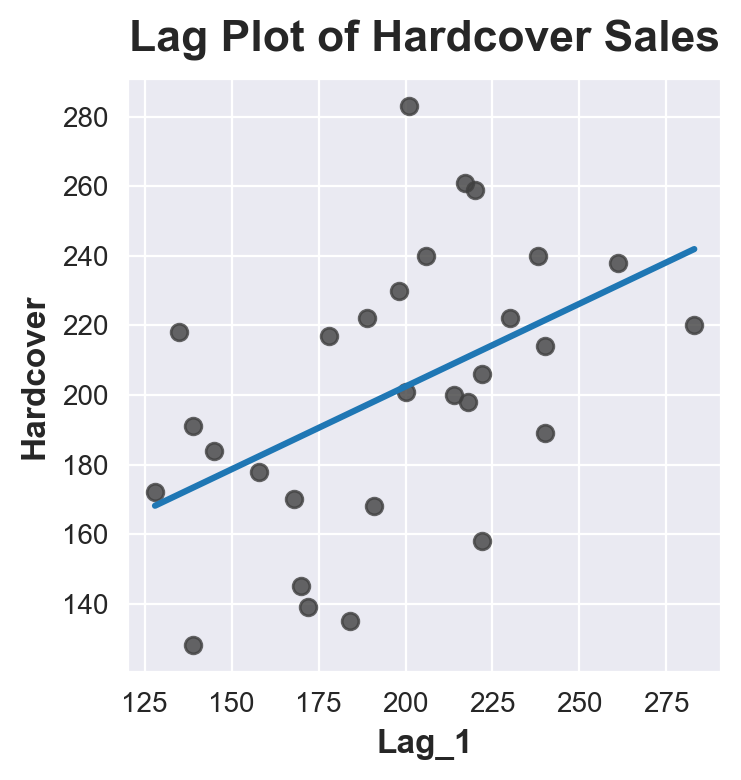

In [8]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

A lag plot shows that daily sales are correlated with the previous day's sales, indicating that a lag feature could be useful for prediction

### Example - Tunnel Trafic 

Tunnel Traffic is a time series describing the number of vehicles traveling through the Baregg Tunnel in Switzerland each day from November 2003 to November 2005. 

In [9]:
from warnings import simplefilter
simplefilter("ignore") 

plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'
tunnel = pd.read_csv("archive/tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day")
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


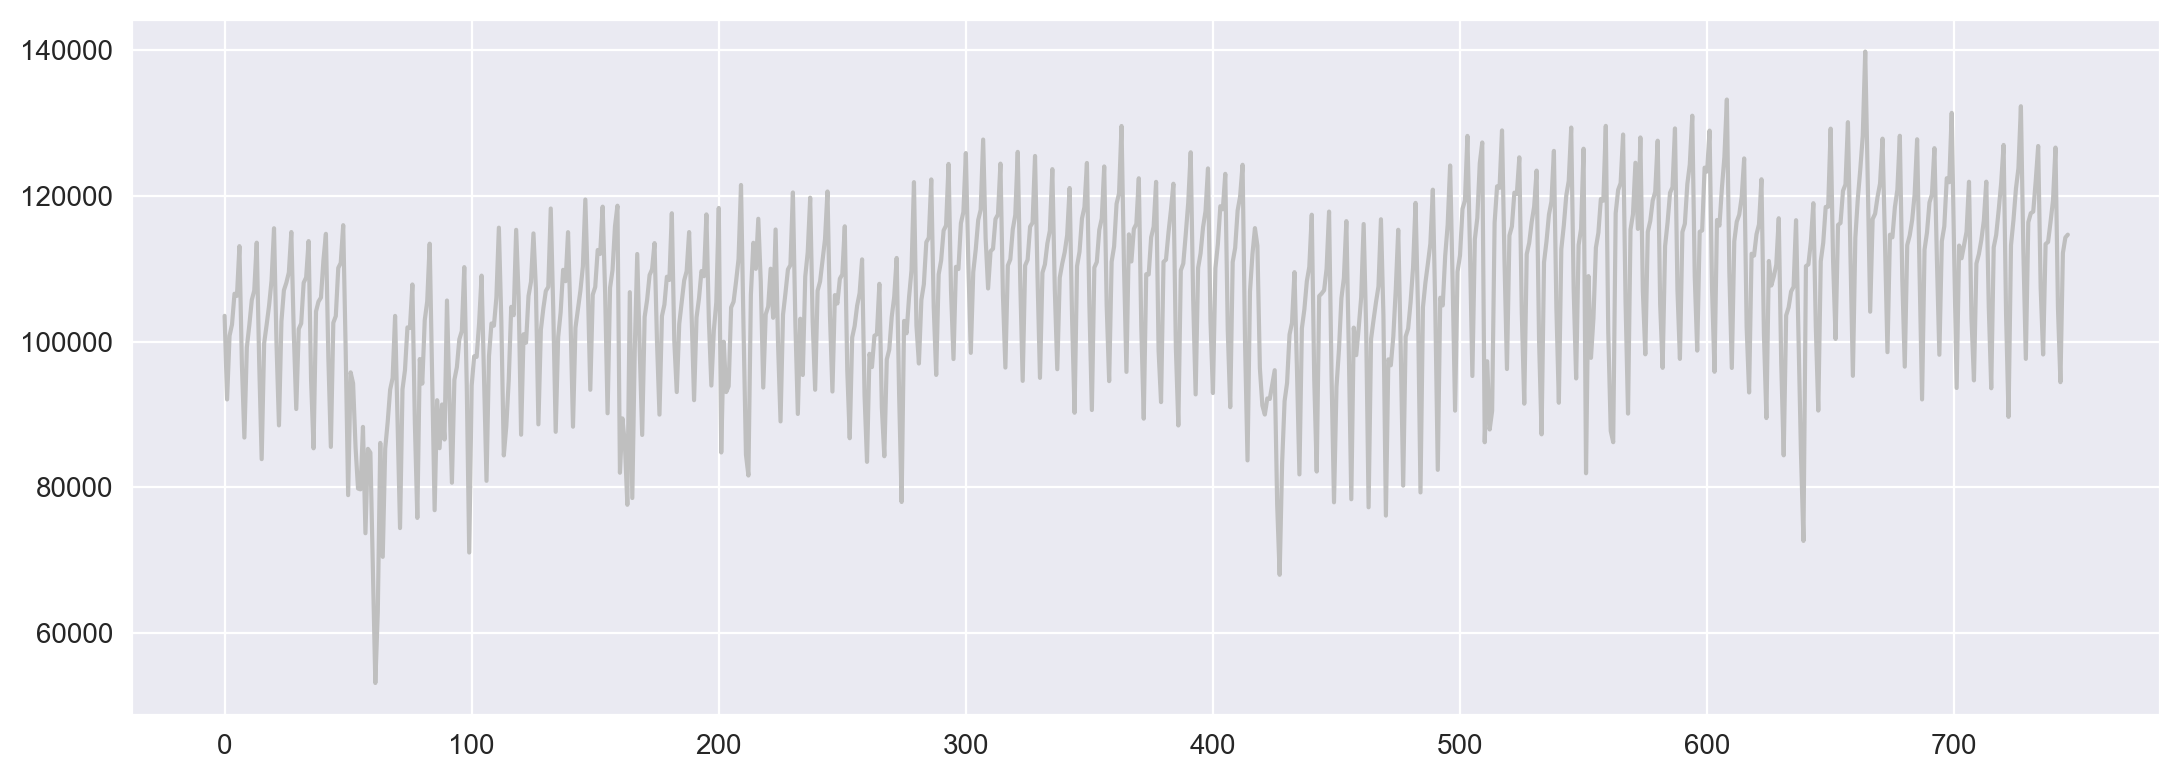

In [10]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()
fig, ax = plt.subplots()
ax.plot('Time', 'NumVehicles', data=df, color='0.75')

In [11]:
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


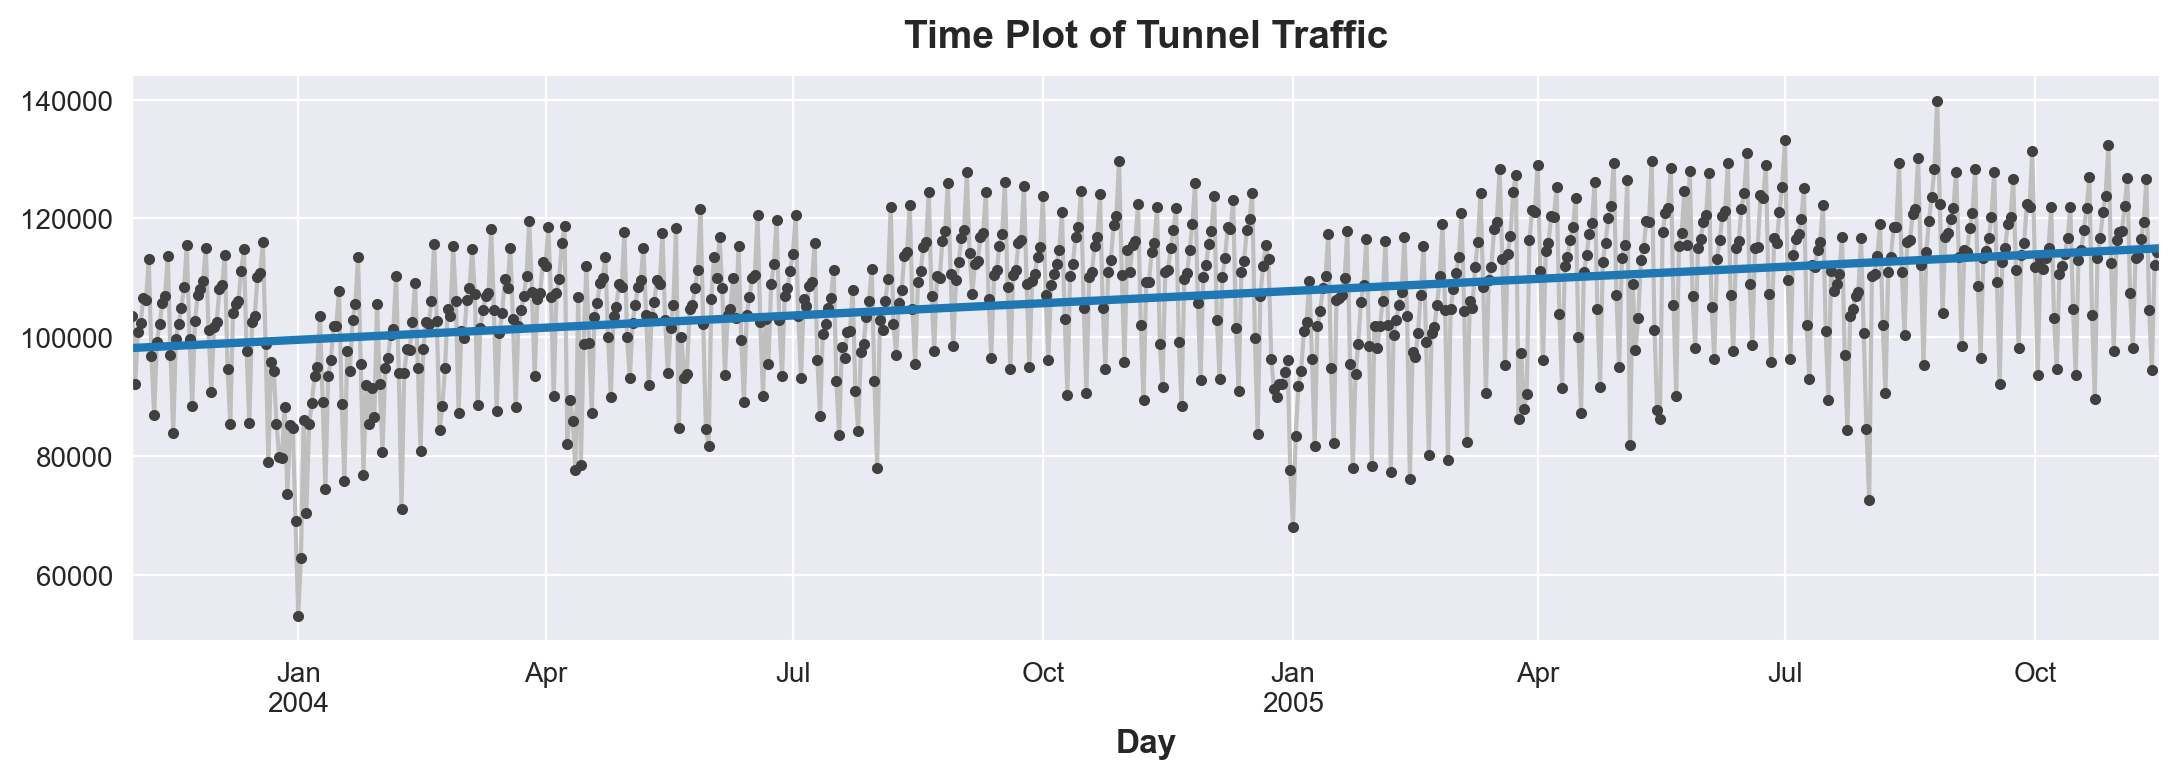

In [12]:
import sklearn
from sklearn.linear_model import LinearRegression

X=df.loc[:,['Time']]
y=df.loc[:,'NumVehicles']

model=LinearRegression()
model.fit(X,y)
y_pred = pd.Series(model.predict(X), index=X.index)
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');



In [13]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


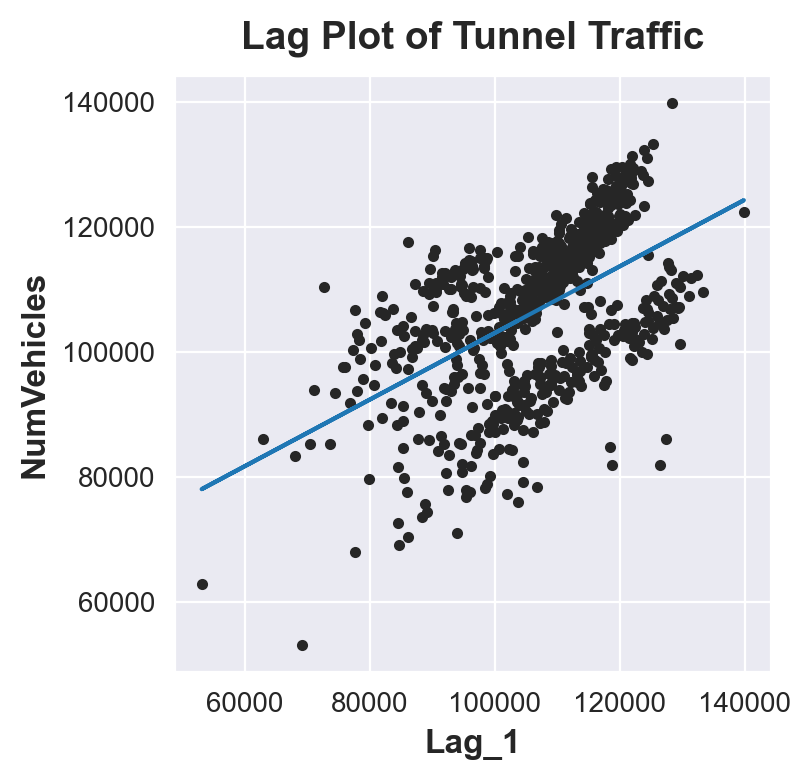

In [23]:
X=df.loc[:,['Lag_1']]
X.dropna(inplace=True)
y=df.loc[:,'NumVehicles']
y = df.loc[:, 'NumVehicles']  # create the target
y, X = y.align(X, join='inner') 

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.15')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

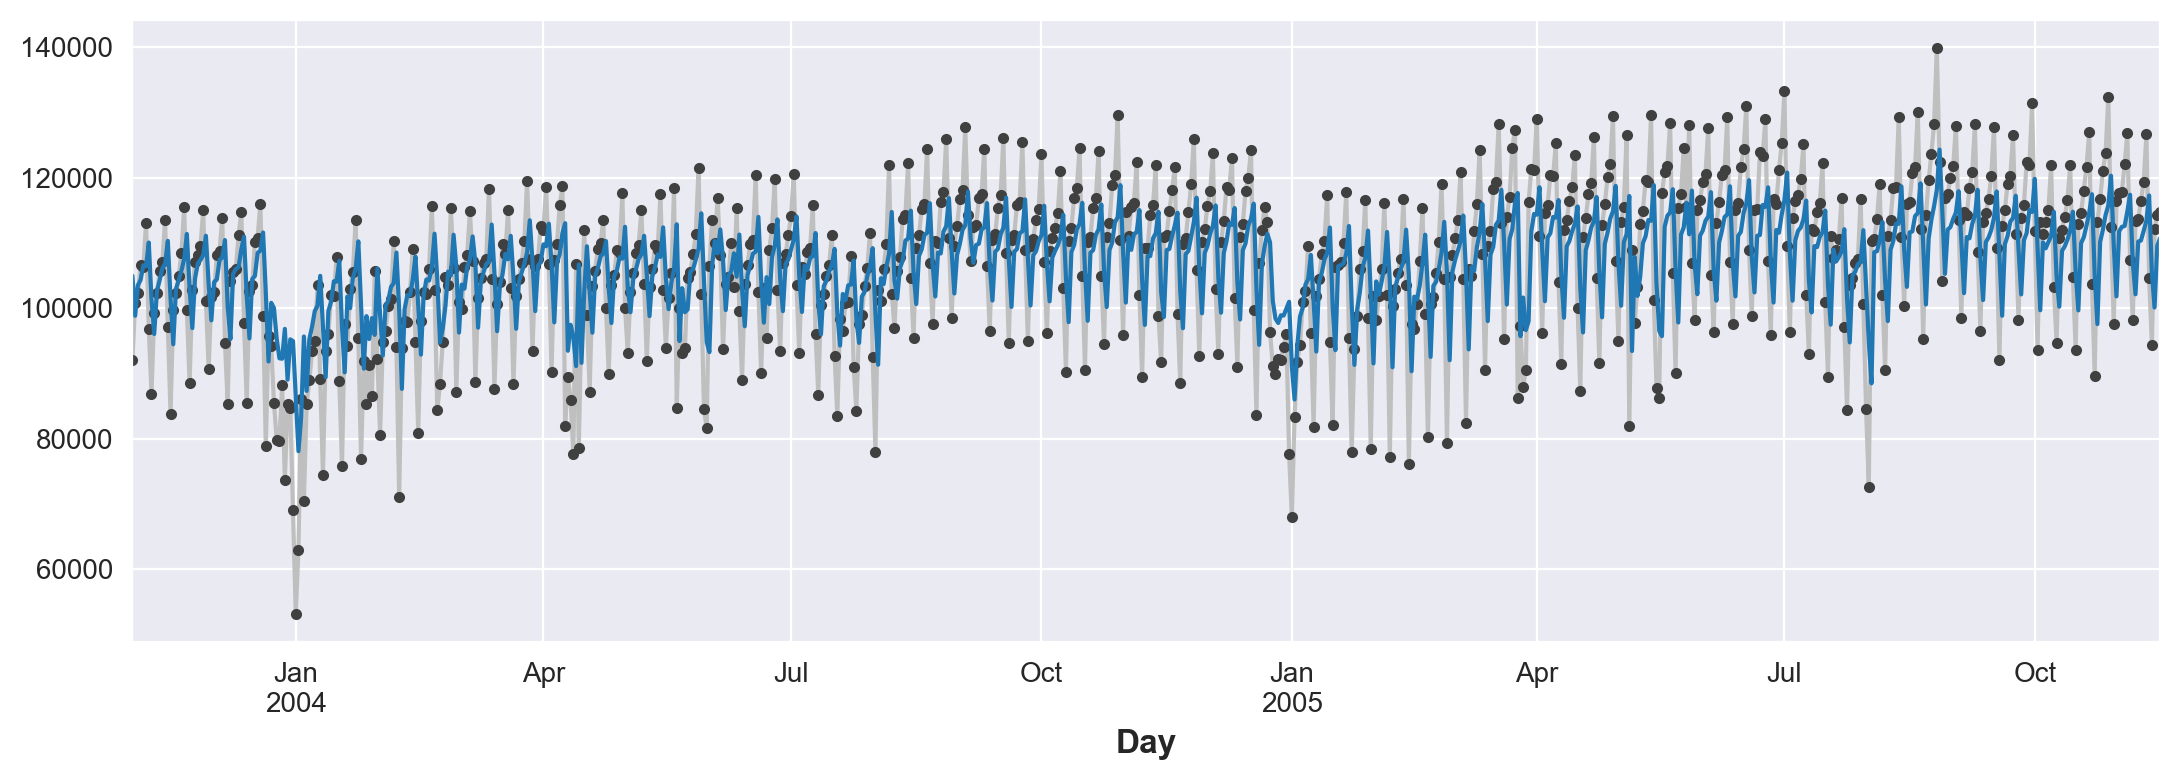

In [24]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

### Exercise

In [44]:
book_sales = pd.read_csv(
    "archive/book_sales.csv",
    index_col='Date',
    parse_dates=['Date'],
).drop(columns=['Paperback'])

book_sales['Time'] = np.arange(len(book_sales.index))
book_sales['Lag_1'] = book_sales['Hardcover'].shift(1)
book_sales.reindex(columns=['Paperback', 'Lag_1','Time'])

ar=pd.read_csv('archive/ar.csv')

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}

store_sales=pd.read_csv(
    'store-sales-time-series-forecasting/train.csv',
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)

store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']

book_sales

,Hardcover,Time,Lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0
2000-04-05,191,4,139.0
2000-04-06,168,5,191.0
2000-04-07,170,6,168.0
2000-04-08,145,7,170.0
2000-04-09,184,8,145.0


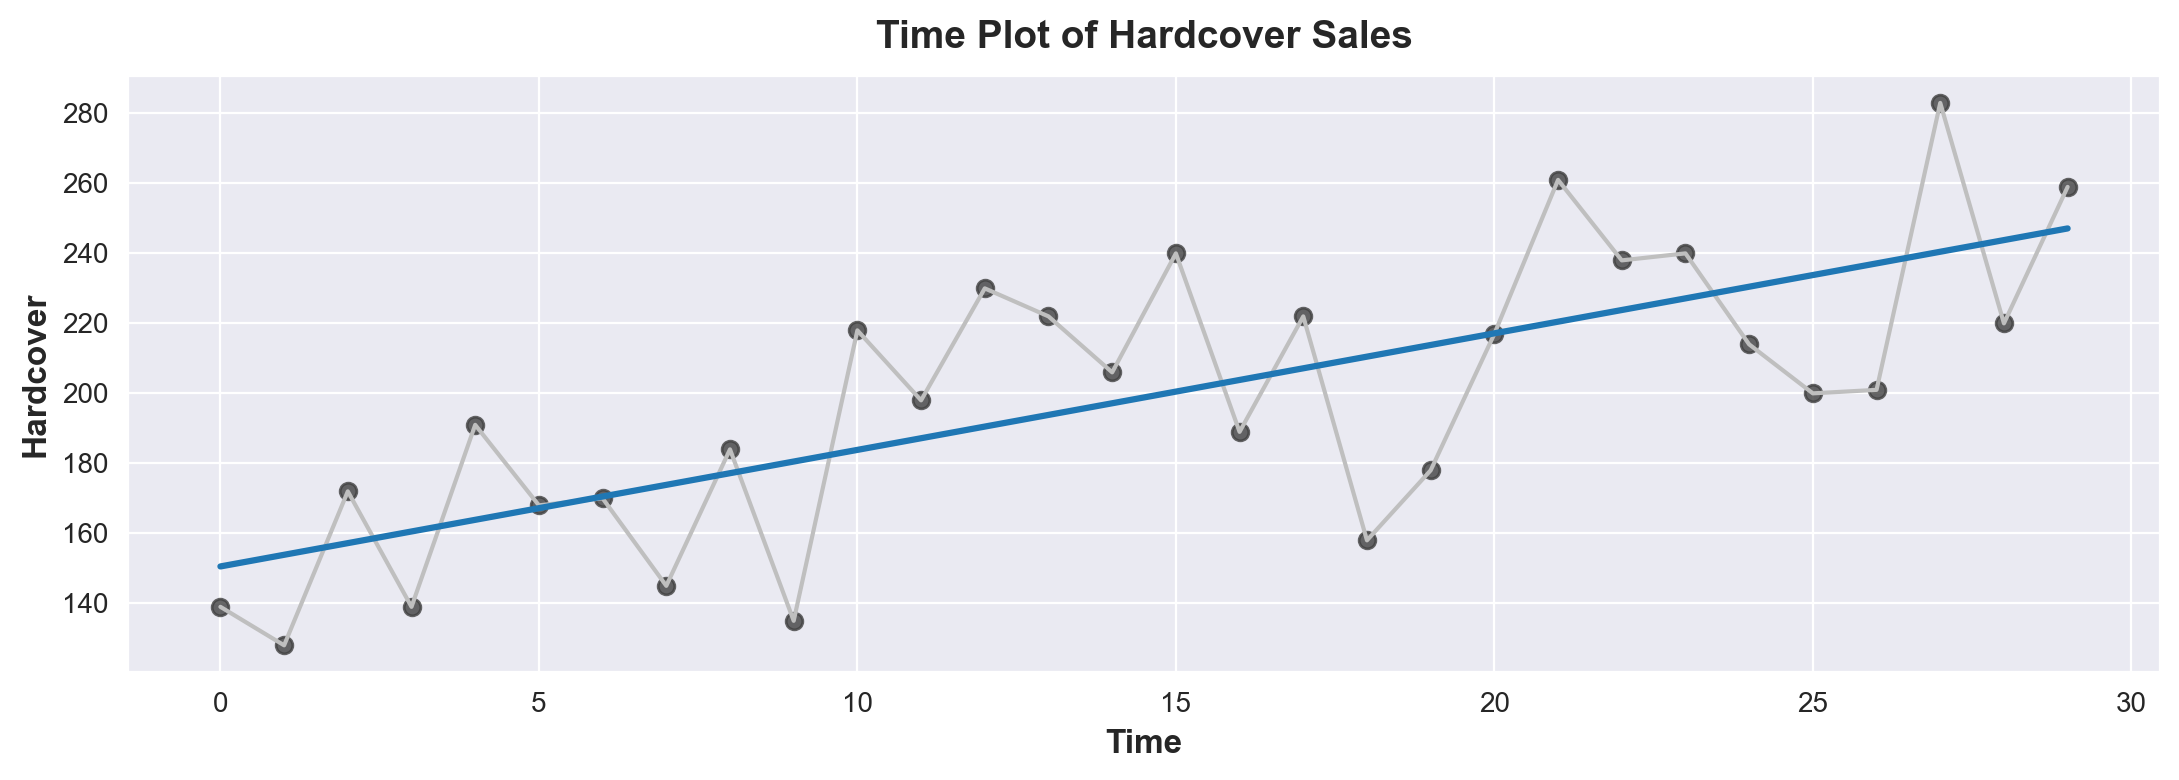

In [45]:
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

In [48]:
ar

,ar1,ar2
0,0.541286,-1.234475
1,-1.692950,3.532498
2,-1.730106,-3.915508
3,-0.783524,2.820841
4,-1.796207,-1.084120
...,...,...
95,-1.242355,2.675995
96,-1.042621,-1.658682
97,-2.032754,2.647366
98,-2.903010,-1.860723


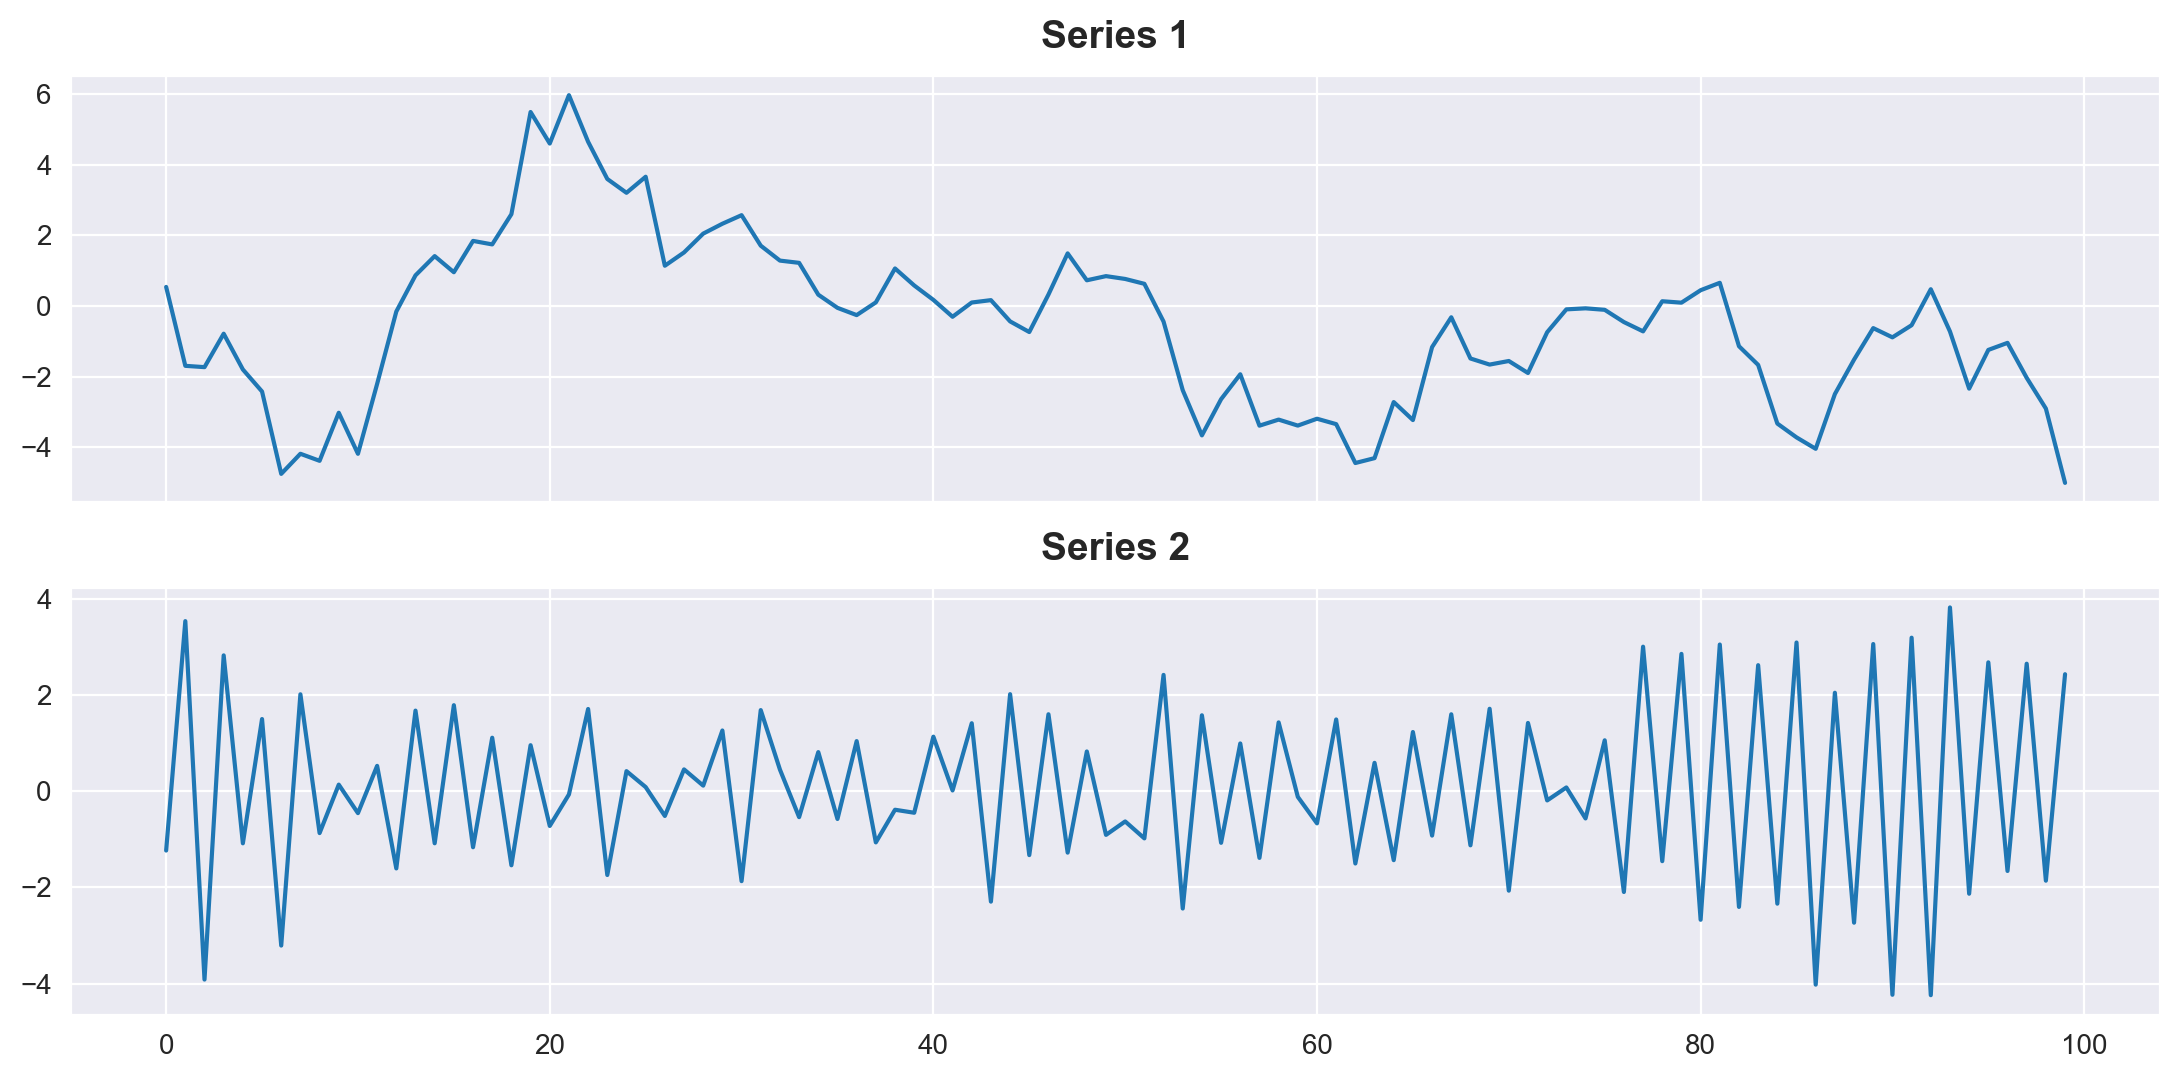

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)
ax1.plot(ar['ar1'])
ax1.set_title('Series 1')
ax2.plot(ar['ar2'])
ax2.set_title('Series 2');

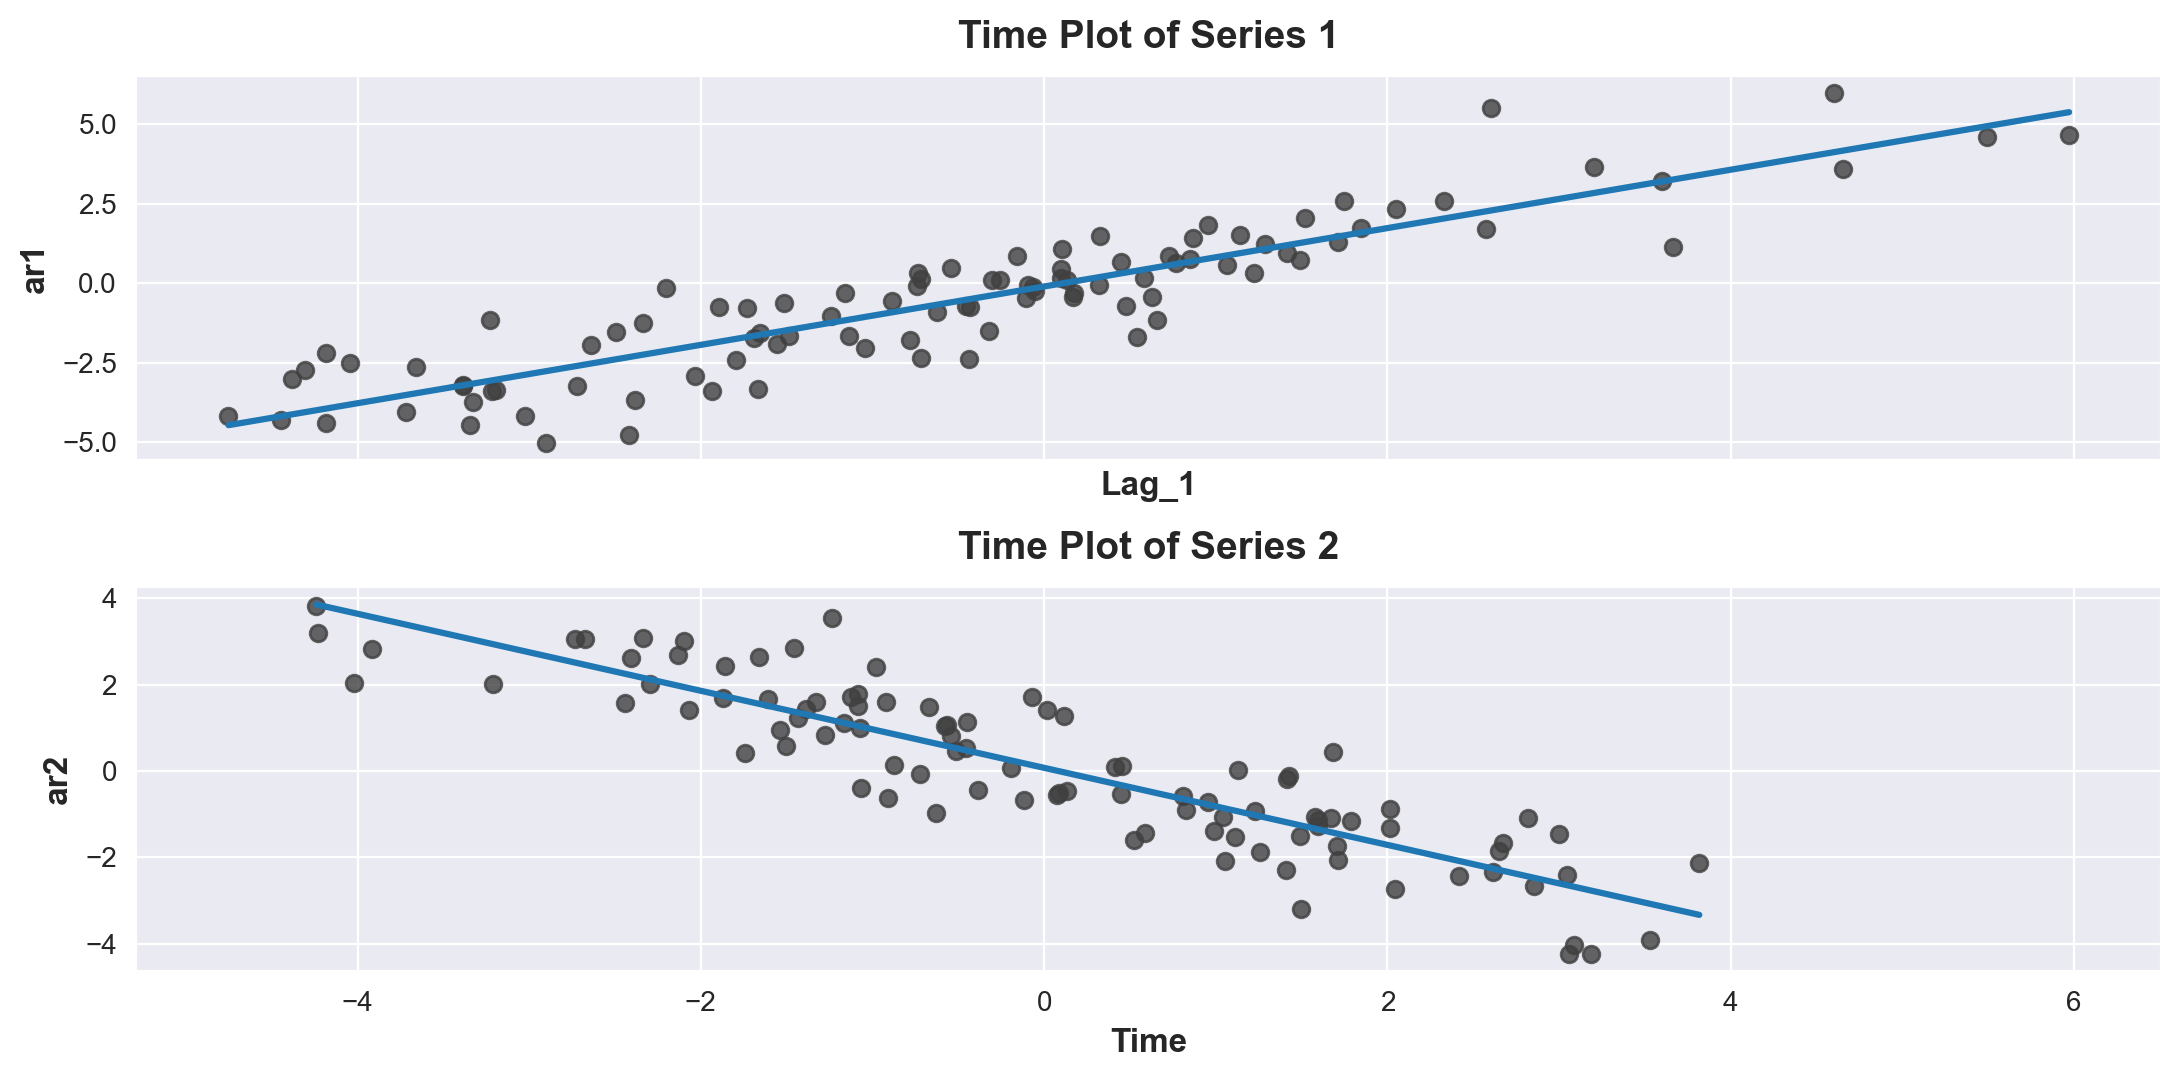

In [58]:
ar['Time'] = np.arange(len(ar.index))
ar['Lag_1'] = ar['ar1'].shift(1)
ar['Lag_2'] = ar['ar2'].shift(1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)

sns.regplot(x='Lag_1', y='ar1', data=ar, ax=ax1, ci=None, scatter_kws=dict(color='0.25'))
ax1.set_title('Time Plot of Series 1')

sns.regplot(x='Lag_2', y='ar2', data=ar, ax=ax2, ci=None, scatter_kws=dict(color='0.25'))
ax2.set_title('Time Plot of Series 2')

ax2.set_xlabel('Time')
plt.tight_layout()
plt.show()


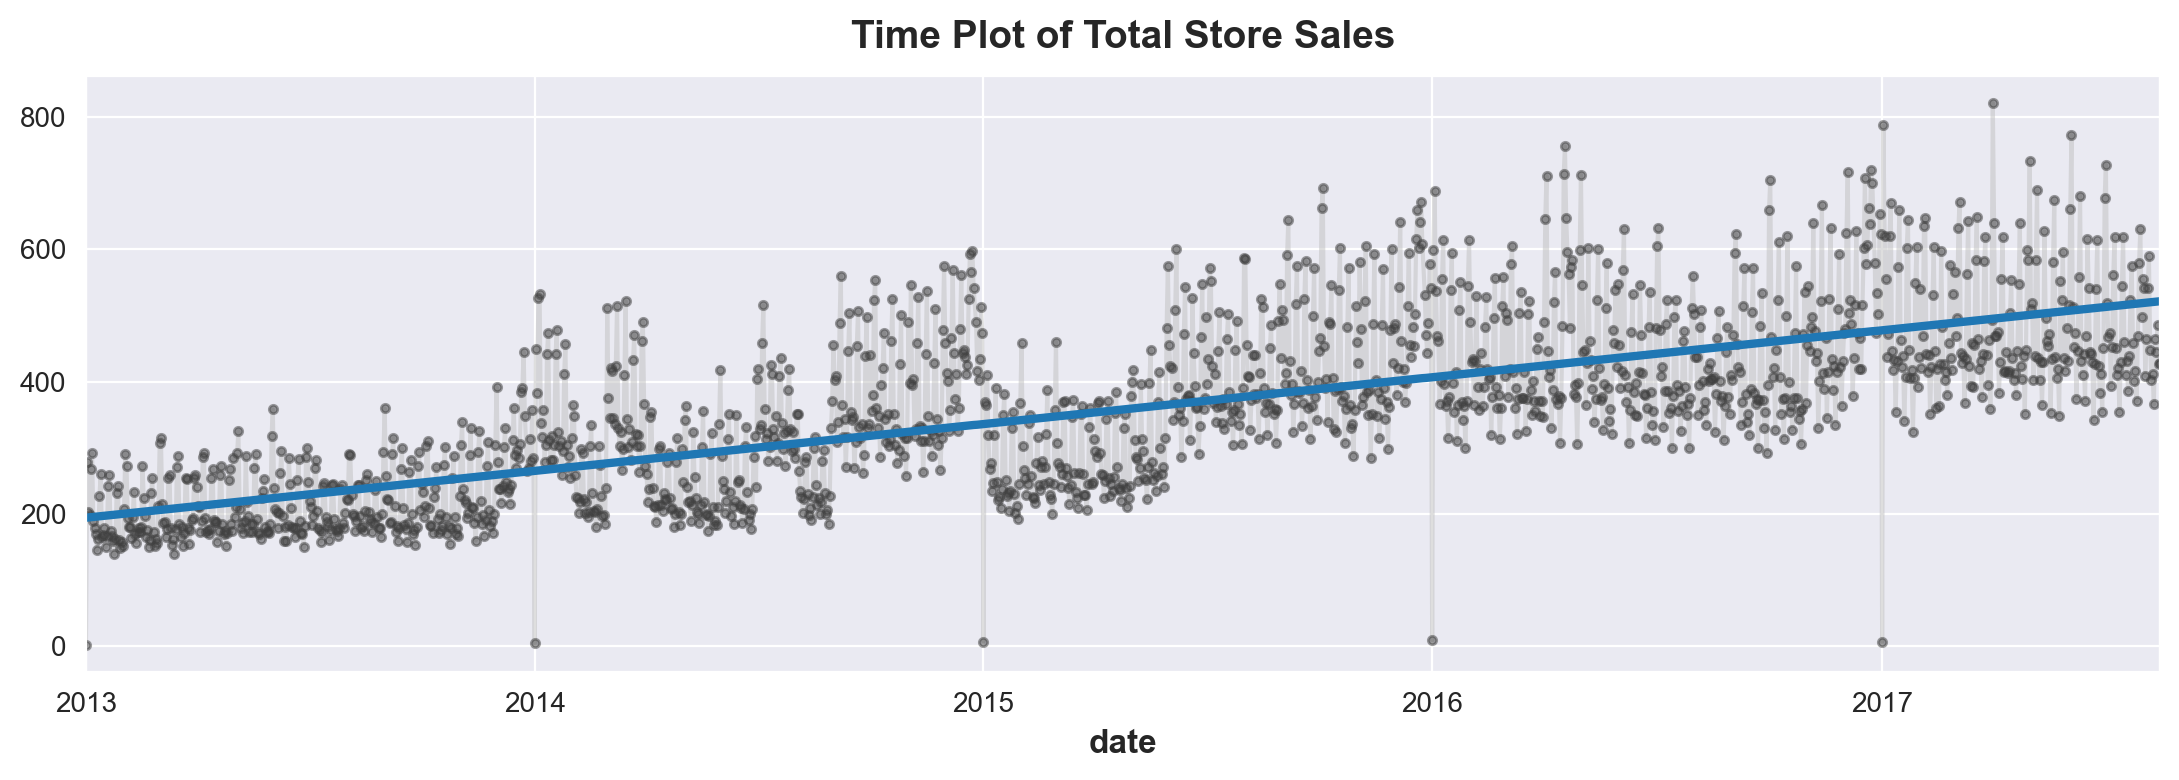

In [76]:
df = average_sales.to_frame()

df['time']=np.arange(len(df.index))

X=df.loc[:,['time']]
y=df.loc[:,'sales']

model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');


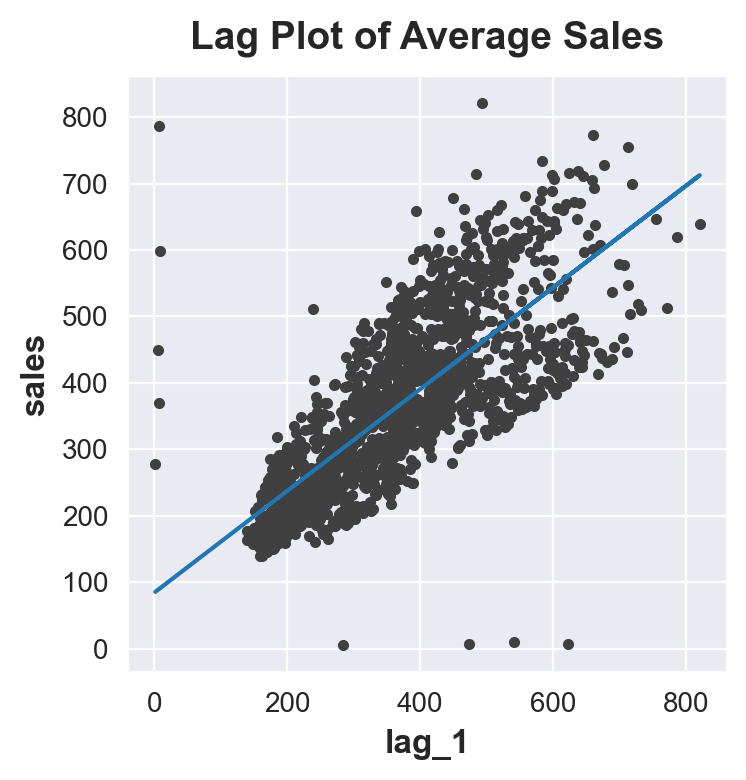

In [79]:
df = average_sales.to_frame()

lag_1=df['sales'].shift(1)
df['lag_1'] = lag_1 
X = df.loc[:, ['lag_1']].dropna()  # features
y = df.loc[:, 'sales']  # target
y, X = y.align(X, join='inner')
model = LinearRegression()
model.fit(X, y)

y_pred=pd.Series(model.predict(X),index=X.index)

fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');